Dataset Shape: (365, 4)


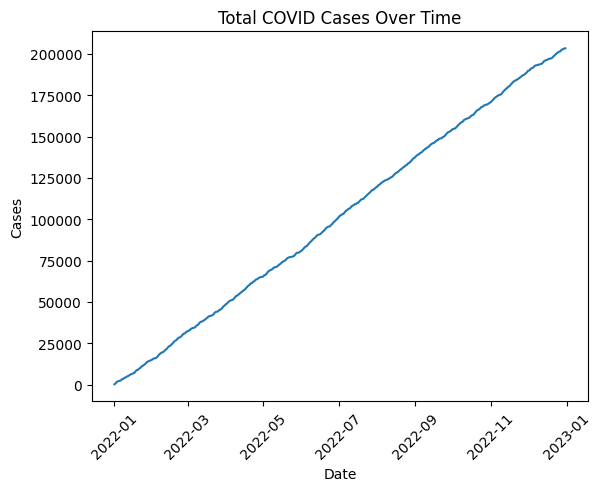

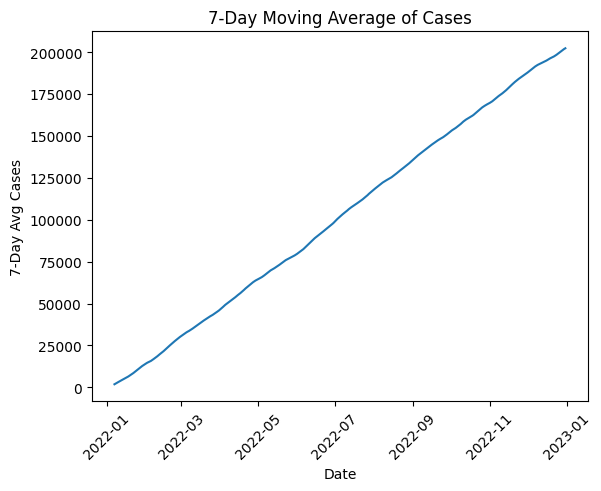

Final Death Rate: 0.04698794588671197


In [1]:
# ==================================
# COVID-19 TIME SERIES ANALYSIS
# ==================================

!pip install pandas numpy matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------
# 1. Generate Dataset
# -----------------------

days = 365
dates = pd.date_range(start="2022-01-01", periods=days)

cases = np.random.randint(100, 1000, days).cumsum()
deaths = np.random.randint(1, 50, days).cumsum()
recoveries = np.random.randint(50, 900, days).cumsum()

df = pd.DataFrame({
    "Date": dates,
    "Total_Cases": cases,
    "Total_Deaths": deaths,
    "Total_Recoveries": recoveries
})

df.to_csv("covid_data.csv", index=False)

print("Dataset Shape:", df.shape)

# -----------------------
# 2. Rolling Average
# -----------------------

df["Cases_7Day_Avg"] = df["Total_Cases"].rolling(7).mean()

# -----------------------
# 3. Plot Cases Trend
# -----------------------

plt.figure()
plt.plot(df["Date"], df["Total_Cases"])
plt.title("Total COVID Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.show()

# -----------------------
# 4. Plot 7-Day Average
# -----------------------

plt.figure()
plt.plot(df["Date"], df["Cases_7Day_Avg"])
plt.title("7-Day Moving Average of Cases")
plt.xlabel("Date")
plt.ylabel("7-Day Avg Cases")
plt.xticks(rotation=45)
plt.show()

# -----------------------
# 5. Death Rate Calculation
# -----------------------

df["Death_Rate"] = df["Total_Deaths"] / df["Total_Cases"]
print("Final Death Rate:", df["Death_Rate"].iloc[-1])